<a href="https://colab.research.google.com/github/allenpatrickargente/CPEN-21A-CPE-1-1/blob/main/Activity_1_Excel_EngineerData_Explorers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                                                                                                                                                                     How long does your daily commute, on average, take one way?  \
NaN NaN yes 202101886 NaN                        BSCPE 3-1 lanzandrei.catamisan@cvsu.edu.ph     Indang 3-4 days Less than 30 minutes Public transportation (e.g., bus, jeepney) No  10-20 km                                                         2             
            20102061  King John Adamz Paglinawan BSCPE 3-1 kingjohnadamz.paglinawan@cvsu.edu.ph Indang 1-2 days 30 minutes to 1 hour Public transportation (e.g., bus, jeepney) No  Less than 5 km                                                   3             
            202203719 Nel                        BSCPE 2-2 main.neljohnceen.pulido@cvsu.edu.ph  Indang 3-4 days Less than 30 minutes Public transportation (e.g., bus, jeepney) Yes 5-10 km                                 

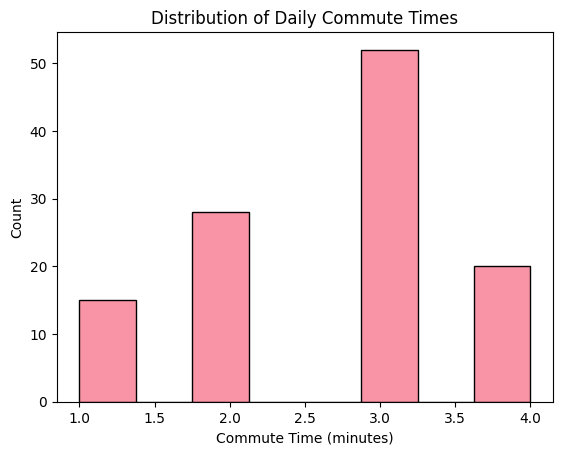

<ipython-input-39-5e04f6971ecc>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='What is your primary mode of transportation for commuting to the university?',


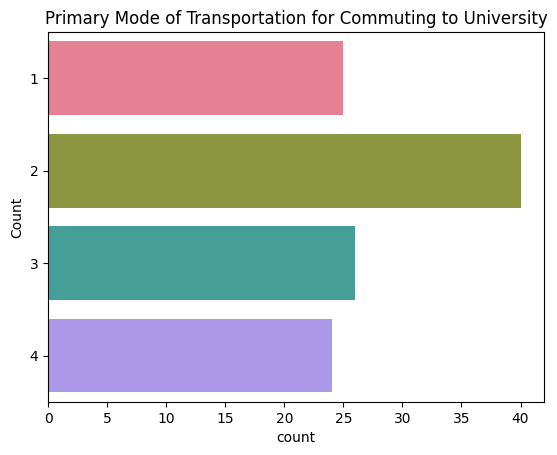

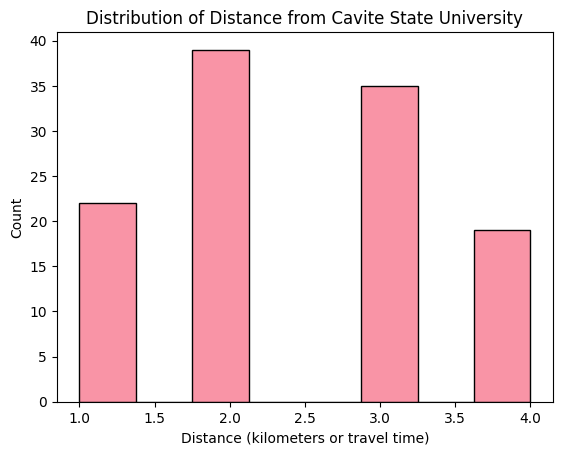

<ipython-input-39-5e04f6971ecc>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='How satisfied are you with your experience commuting to Cavite State University for classes?',


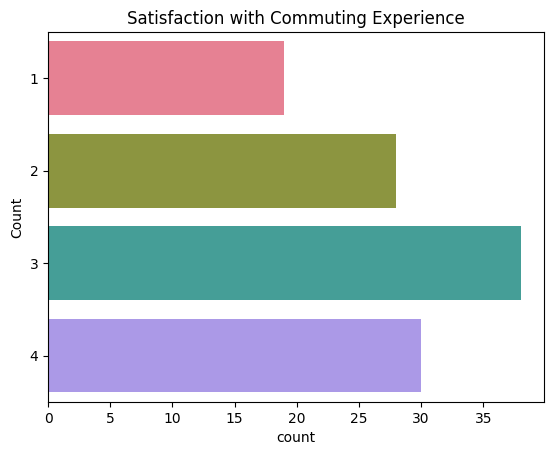

<ipython-input-39-5e04f6971ecc>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='How satisfied are you with the distance between your home and Cavite State University?',


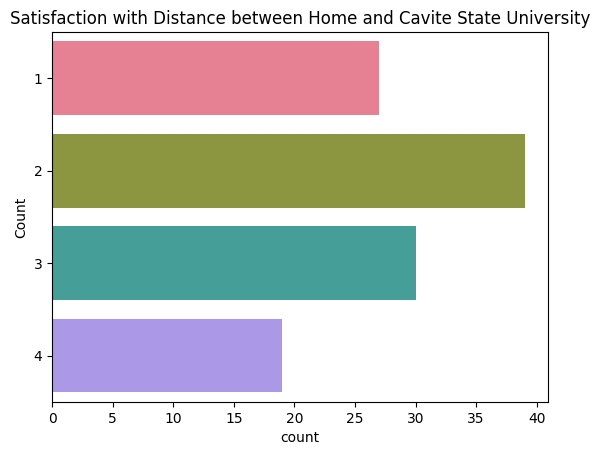

In [ ]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from io import StringIO
import requests

url = 'https://docs.google.com/spreadsheets/d/12JJM5ehXIx7kStNFkSeJjERubkJVBPCtKZs1F_FfVCg/export?format=csv'
col_name = ['How long does your daily commute, on average, take one way?',
            'What is your primary mode of transportation for commuting to the university?',
            'How far do you live from Cavite State University (in kilometers or approximate travel time)?',
            'How satisfied are you with your experience commuting to Cavite State University for classes?',
            'How satisfied are you with the distance between your home and Cavite State University?']

# Fetch the CSV data
response = requests.get(url)
data = StringIO(response.text)

# Read the CSV with error handling
try:
    dataset = pd.read_csv(data, names=col_name, skiprows=1)
    # Skiprows parameter is used to skip any additional header rows if present.
    # Adjust the value based on your actual CSV file structure.

    # Now you can work with the 'dataset' DataFrame
    print(dataset.head())
except pd.errors.ParserError as e:
    print(f"Error parsing CSV: {e}")

# Plot the data
# Example plots (replace with your actual plot code)

# Plot commute times
sns.histplot(dataset['How long does your daily commute, on average, take one way?'])
plt.title('Distribution of Daily Commute Times')
plt.xlabel('Commute Time (minutes)')
plt.show()

# Plot primary mode of transportation
sns.countplot(y='What is your primary mode of transportation for commuting to the university?',
              data=dataset, palette='husl')
plt.title('Primary Mode of Transportation for Commuting to University')
plt.ylabel('Count')
plt.show()

# Plot distance from Cavite State University
sns.histplot(dataset['How far do you live from Cavite State University (in kilometers or approximate travel time)?'])
plt.title('Distribution of Distance from Cavite State University')
plt.xlabel('Distance (kilometers or travel time)')
plt.show()

# Plot satisfaction with commuting experience
sns.countplot(y='How satisfied are you with your experience commuting to Cavite State University for classes?',
              data=dataset, palette='husl')
plt.title('Satisfaction with Commuting Experience')
plt.ylabel('Count')
plt.show()

# Plot satisfaction with distance between home and Cavite State University
sns.countplot(y='How satisfied are you with the distance between your home and Cavite State University?',
              data=dataset, palette='husl')
plt.title('Satisfaction with Distance between Home and Cavite State University')
plt.ylabel('Count')
plt.show()


In [ ]:
dataset.shape

(115, 5)

In [ ]:
dataset.head(22)

How long does your daily commute, on average, take one way?  \
NaN NaN yes 202101886 NaN                        BSCPE 3-1 lanzandrei.catamisan@cvsu.edu.ph     Indang         3-4 days Less than 30 minutes Public transportation (e.g., bus, jeepney) No  10-20 km                                                         2             
            20102061  King John Adamz Paglinawan BSCPE 3-1 kingjohnadamz.paglinawan@cvsu.edu.ph Indang         1-2 days 30 minutes to 1 hour Public transportation (e.g., bus, jeepney) No  Less than 5 km                                                   3             
            202203719 Nel                        BSCPE 2-2 main.neljohnceen.pulido@cvsu.edu.ph  Indang         3-4 days Less than 30 minutes Public transportation (e.g., bus, jeepney) Yes 5-10 km                                                          2             
            202205153 Mark Jezreel Antivo        BSCPE 2-2 main.markjezreel.antivo@cvsu.edu.ph  Indang         1-2 days More than 2 hours    Public transportation (e.g., bus, jeepney) Yes More than 20 km                                                  3             
            202103531 NaN                        BSCPE 3-1 babyangel.rupido@cvsu.edu.ph         Indang         3-4 days Less than 30 minutes Public transportation (e.g., bus, jeepney) No  10-20 km                                                         3             
            202200731 NaN                        NaN       main.warreondave.mojica@cvsu.edu.ph  Indang         3-4 days Less than 30 minutes Public transportation (e.g., bus, jeepney) Yes Less than 5 km                                                   3             
            202305333 Harley                     BSCPE 1-2 daveharley.javier@cvsu.edu.ph        Dasma          3-4 days 1-2 hours            Public transportation (e.g., bus, jeepney) Yes 10-20 km                                                         2             
            202302713 GARCIA, JOHN ZEDRICK L.    BSCPE 1-2 johnzedrick.garcia@cvsu.edu.ph       Indang         1-2 days 1-2 hours            Car                                        Yes More than 20 km                                                  3             
            202303409 Christian P. Samudio       BSCPE 1-2 christian.samudio@cvsu.edu.ph        Trece Martires 3-4 days 30 minutes to 1 hour Public transportation (e.g., bus, jeepney) No  5-10 km                                                          3             
            202101487 NaN                        BSCPE 3-1 miro.angeles@cvsu.edu.ph             Dasma          3-4 days 1-2 hours            Public transportation (e.g., bus, jeepney) Yes More than 20 km                                                  3             
            202101628 NaN                        BSCPE 3-1 dominic.marasigan@cvsu.edu.ph        Trece Martires 3-4 days 30 minutes to 1 hour Public transportation (e.g., bus, jeepney) No  5-10 km                                                          1             
            202101624 Kurikiong                  BSCPE 3-1 joshua.atencia@cvsu.edu.ph           Dasma          3-4 days More than 2 hours    Public transportation (e.g., bus, jeepney) Yes 10-20 km                                                         1             
            202014600 NaN                        BSCPE 4-2 ronneljohn.dinglasan@cvsu.edu.ph     Trece Martires 3-4 days 30 minutes to 1 hour Public transportation (e.g., bus, jeepney) No  10-20 km                                                         1             
            202101723 NaN                        BSCPE 3-1 wearlian.baguio@cvsu.edu.ph          Dasma          3-4 days More than 2 hours    Public transportation (e.g., bus, jeepney) Yes More than 20 km                                                  1             
            202012107 NaN                        BSCPE 4-2 elroikenji.enrique@cvsu.edu.ph       Trece Martires 3-4 days 30 minutes to 1 hour Public transportation (e.g., bus, jeepney) Y

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 115 entries, (nan, nan, 'yes', 202101886, nan, 'BSCPE 3-1', 'lanzandrei.catamisan@cvsu.edu.ph', 'Indang', '3-4 days', 'Less than 30 minutes', 'Public transportation (e.g., bus, jeepney)', 'No', '10-20 km') to (nan, nan, 'yes', 201911914, nan, 'BSCPE 5-1', 'ronaldandrew.tolentin@cvsu.edu.ph', 'Trece Martires', '1-2 days', '30 minutes to 1 hour', 'Public transportation (e.g., bus, jeepney)', 'Yes', '5-10 km')
Data columns (total 5 columns):
 #   Column                                                                                        Non-Null Count  Dtype
---  ------                                                                                        --------------  -----
 0   How long does your daily commute, on average, take one way?                                   115 non-null    int64
 1   What is your primary mode of transportation for commuting to the university?                  115 non-null    int64
 2   How far do you liv

In [ ]:
dataset['How long does your daily commute, on average, take one way?'].value_counts()

3    52
2    28
4    20
1    15
Name: How long does your daily commute, on average, take one way?, dtype: int64

In [ ]:
dataset['What is your primary mode of transportation for commuting to the university?'].value_counts()

2    40
3    26
1    25
4    24
Name: What is your primary mode of transportation for commuting to the university?, dtype: int64

In [ ]:
dataset['How far do you live from Cavite State University (in kilometers or approximate travel time)?'].value_counts()

2    39
3    35
1    22
4    19
Name: How far do you live from Cavite State University (in kilometers or approximate travel time)?, dtype: int64

In [ ]:
dataset['How satisfied are you with your experience commuting to Cavite State University for classes?'].value_counts()

3    38
4    30
2    28
1    19
Name: How satisfied are you with your experience commuting to Cavite State University for classes?, dtype: int64

In [ ]:
dataset['How satisfied are you with the distance between your home and Cavite State University?'].value_counts()

2    39
3    30
1    27
4    19
Name: How satisfied are you with the distance between your home and Cavite State University?, dtype: int64

<ipython-input-51-010ddfc34427>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='How long does your daily commute, on average, take one way?', data=dataset, palette='husl')


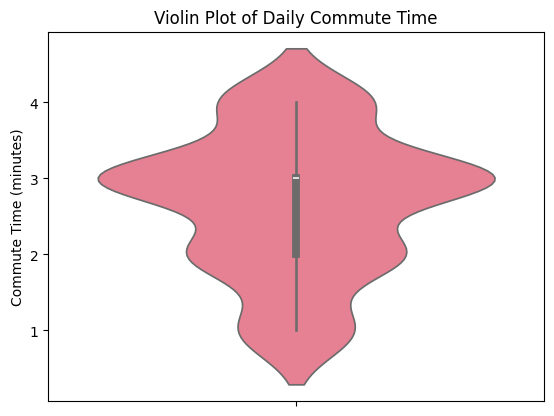

In [ ]:
# Create violin plot for commute time
sns.violinplot(y='How long does your daily commute, on average, take one way?', data=dataset, palette='husl')
plt.title('Violin Plot of Daily Commute Time')
plt.ylabel('Commute Time (minutes)')
plt.show()


<ipython-input-52-94985430bf72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y='What is your primary mode of transportation for commuting to the university?', data=dataset, palette='husl')


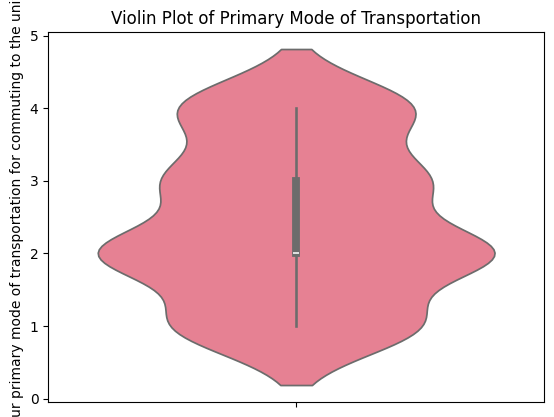

In [ ]:
# Create violin plot for primary mode of transportation
sns.violinplot(y='What is your primary mode of transportation for commuting to the university?', data=dataset, palette='husl')
plt.title('Violin Plot of Primary Mode of Transportation')
plt.show()


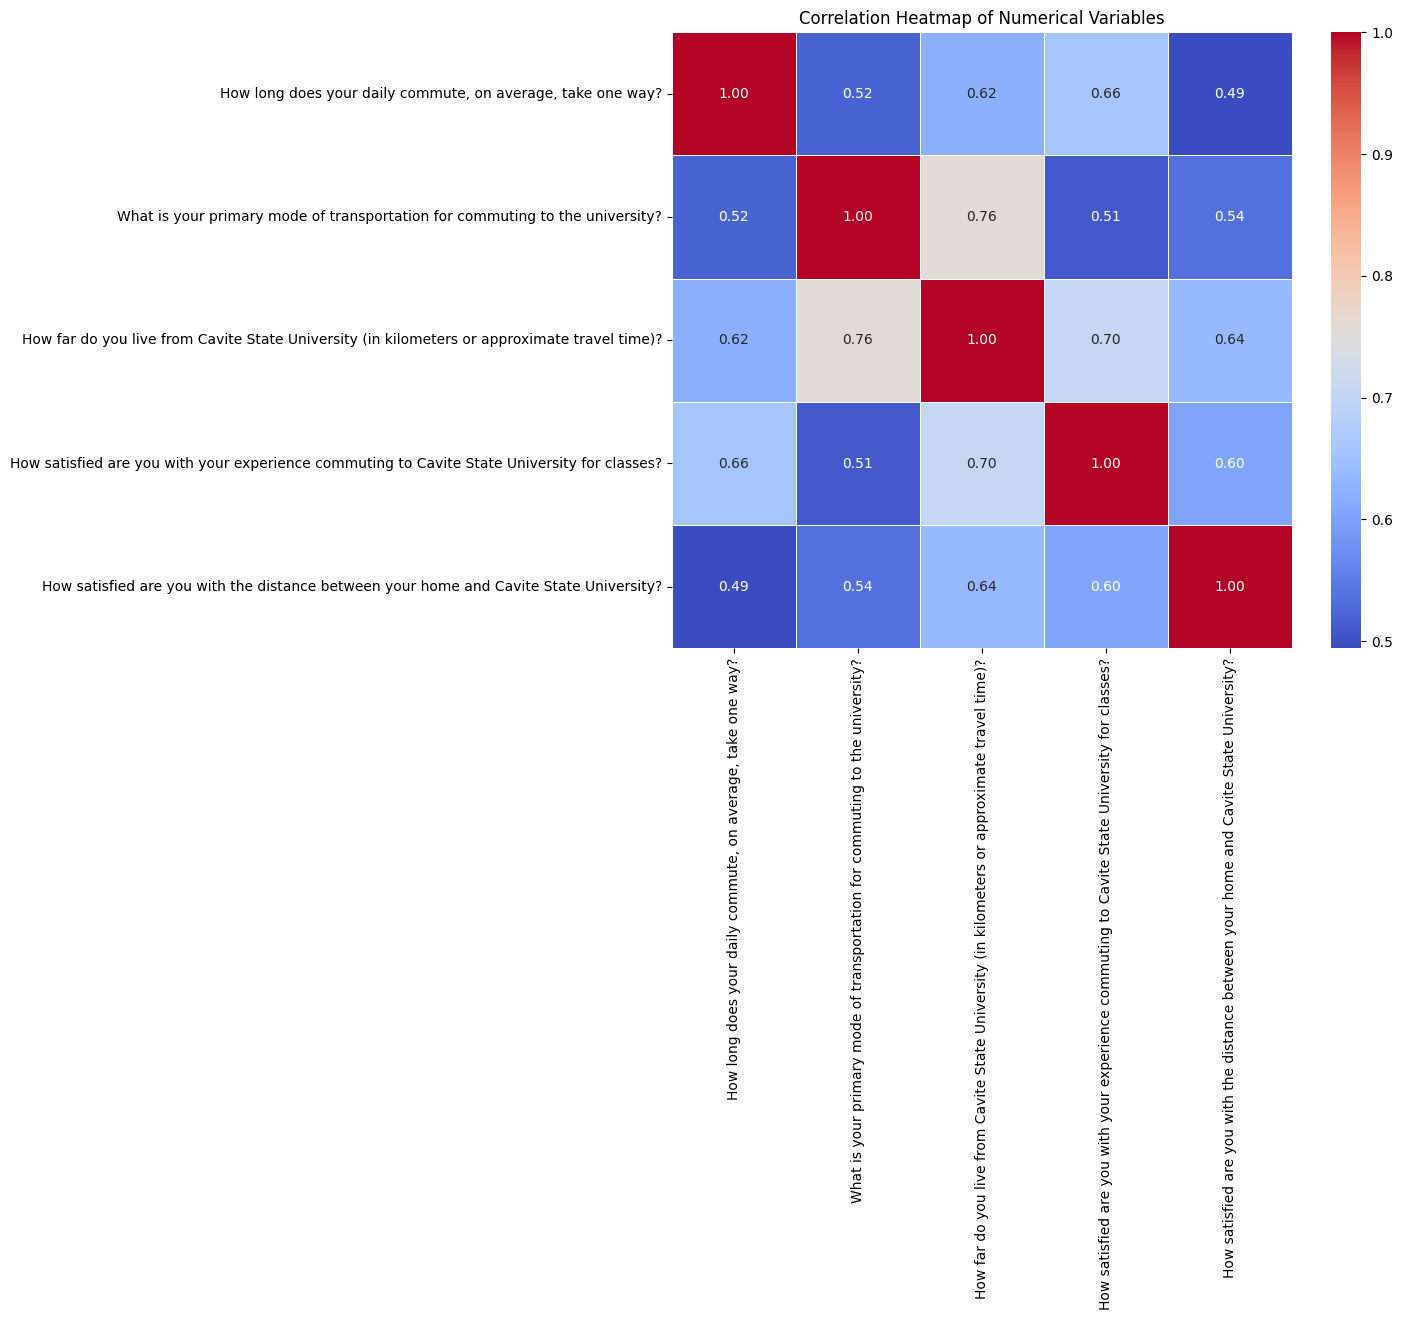

In [ ]:
# Assuming you already have the 'dataset' loaded

# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Set up the figure
plt.figure(figsize=(10, 8))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title and show the plot
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [ ]:
# Assuming you already have the 'dataset' loaded

# Change the target variable 'y'
y = dataset['How long does your daily commute, on average, take one way?']

# Drop the original target variable 'Total_Cases' from features 'X'
X = dataset.drop(['What is your primary mode of transportation for commuting to the university?'], axis=1)

# Check the shapes
print(f'X shape: {X.shape} | y shape: {y.shape}')


X shape: (115, 4) | y shape: (115,)


In [ ]:
X_train, X_test, = train_test_split(X, test_size=0.30, random_state=1)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Assuming you already have X and y defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Create a list of models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

# Evaluate each model in turn
results = []
model_names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    model_names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.875000 (0.090139)
LDA: 0.625000 (0.025000)
KNN: 0.825000 (0.055902)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVC: 0.950000 (0.035355)


In [ ]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [ ]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.9428571428571428
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      0.90      0.95        10
           3       0.88      1.00      0.93        14
           4       1.00      0.86      0.92         7

    accuracy                           0.94        35
   macro avg       0.97      0.94      0.95        35
weighted avg       0.95      0.94      0.94        35

